# Introduction

In this notebook, we aim to analyze and preprocess the air traffic passenger statistics data from San Francisco Airport. The dataset contains various attributes related to airlines, geographical regions, and passenger activities. Our primary goal is to clean the data, handle missing values, and perform clustering analysis to identify patterns and insights. We will use techniques such as data imputation, feature engineering, and clustering algorithms like KMeans to achieve our objectives.

# Import packeges

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/air-traffic-passenger-statistics.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB
None


In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df.isnull().sum().sort_values(ascending=False)

Operating Airline IATA Code    63
Published Airline IATA Code    63
Activity Period                 0
Operating Airline               0
Published Airline               0
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [5]:
df[['Operating Airline', 'Operating Airline IATA Code', 'Published Airline', 'Published Airline IATA Code']].sample(5)

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code
1625,Asiana Airlines,OZ,Asiana Airlines,OZ
4657,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA
18185,SkyWest Airlines,OO,Alaska Airlines,AS
15748,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL
1687,US Airways,US,US Airways,US


# Missing values

## Operating Airline IATA Code

In [6]:
df["Operating Airline IATA Code"].value_counts(),df["Operating Airline IATA Code"].isnull().sum()

(Operating Airline IATA Code
 UA    3807
 OO    1212
 AS     891
 VX     462
 DL     445
       ... 
 IB       6
 WO       3
 XP       2
 5Y       2
 EZ       2
 Name: count, Length: 82, dtype: int64,
 63)

In [7]:
df["Operating Airline"].value_counts(),df["Operating Airline"].isnull().sum()

(Operating Airline
 United Airlines - Pre 07/01/2013    2154
 United Airlines                     1653
 SkyWest Airlines                    1212
 Alaska Airlines                      891
 Virgin America                       462
                                     ... 
 Xtra Airways                           2
 Evergreen International Airlines       2
 Pacific Aviation                       2
 Icelandair EHF                         2
 Boeing Company                         1
 Name: count, Length: 89, dtype: int64,
 0)

In [8]:
df[df["Operating Airline IATA Code"].isnull()].sample(2)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
9485,201204,Swissport USA,NaN,Swissport USA,NaN,International,Europe,Enplaned,Other,International,A,183
8792,201110,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,48


In [9]:
df[df["Operating Airline"] == "Servisair"].sample()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
7968,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,64


### Servisair -> SGH


In [10]:
df.loc[df["Operating Airline"] == "Servisair", "Operating Airline IATA Code"] = "SGH"

In [11]:
df.isnull().sum().sort_values(ascending=False)

Published Airline IATA Code    63
Operating Airline IATA Code    27
Activity Period                 0
Operating Airline               0
Published Airline               0
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

------------

### Swissport USA -> SWP

In [12]:
df[df["Operating Airline IATA Code"].isnull()].sample(2)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
17632,201710,Swissport USA,NaN,Swissport USA,NaN,International,Europe,Enplaned,Other,International,A,73
11782,201312,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Enplaned,Other,International,A,216


In [13]:
df[df["Operating Airline"] == "Swissport USA"].sample(2)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
10861,201304,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Deplaned,Other,International,A,399
16188,201612,Swissport USA,NaN,Swissport USA,NaN,International,Europe,Enplaned,Other,International,A,274


In [14]:
df.loc[df["Operating Airline"] == "Swissport USA", "Operating Airline IATA Code"] = "SWP"

---------

In [15]:
df.isnull().sum().sort_values(ascending=False)

Published Airline IATA Code    63
Operating Airline IATA Code     5
Activity Period                 0
Operating Airline               0
Published Airline               0
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [16]:
df[df["Operating Airline IATA Code"].isnull()]["Operating Airline"].sample(5)

16869    Trego Dugan Aviation
148            Boeing Company
6920         Pacific Aviation
16868    Trego Dugan Aviation
6921         Pacific Aviation
Name: Operating Airline, dtype: object

### Trego Dugan Aviation -> TDA
### Boeing Company -> BC
### Pacific Aviation  -> PA

In [17]:
df.loc[df["Operating Airline"] == "Trego Dugan Aviation", "Operating Airline IATA Code"] = "TDA"

In [18]:
df.loc[df["Operating Airline"] == "Boeing Company", "Operating Airline IATA Code"] = "BC"

In [19]:
df.loc[df["Operating Airline"] == "Pacific Aviation", "Operating Airline IATA Code"] = "PA"

----------

## Published Airline IATA Code

In [20]:
df.isnull().sum().sort_values(ascending=False)

Published Airline IATA Code    63
Activity Period                 0
Operating Airline               0
Operating Airline IATA Code     0
Published Airline               0
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [21]:
df[df["Published Airline IATA Code"].isnull()]["Operating Airline"].unique()

array(['Boeing Company', 'Servisair', 'Pacific Aviation', 'Swissport USA',
       'Trego Dugan Aviation'], dtype=object)

In [22]:
df.loc[df["Published Airline"] == "Boeing Company", "Published Airline IATA Code"] = "BC"
df.loc[df["Published Airline"] == "Servisair", "Published Airline IATA Code"] = "SGH"
df.loc[df["Published Airline"] == "Pacific Aviation", "Published Airline IATA Code"] = "PA"
df.loc[df["Published Airline"] == "Swissport USA", "Published Airline IATA Code"] = "SWP"
df.loc[df["Published Airline"] == "Trego Dugan Aviation", "Published Airline IATA Code"] = "TDA"

--------------

# Data Analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18885 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18885 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [24]:
#operating airline and published airline are droped
df.drop(columns=["Operating Airline", "Published Airline"], inplace=True)

In [25]:
df["GEO Summary"].value_counts() 

GEO Summary
International    11904
Domestic          6981
Name: count, dtype: int64

In [26]:
df["GEO Region"].value_counts()

GEO Region
US                     6981
Asia                   4073
Europe                 2803
Canada                 1794
Mexico                 1455
Australia / Oceania     951
Central America         383
Middle East             354
South America            91
Name: count, dtype: int64

In [27]:
import numpy as np

conditions = [
    df["GEO Region"].isin(["US", "Canada", "Mexico", "Central America", "Caribbean", "South America"]),
    df["GEO Region"] == "Europe",
    df["GEO Region"].isin(["Asia", "Middle East"])
]

choices = ["America", "Europe", "Asia"]

df["Continent"] = np.select(conditions, choices, default="Oceania")

In [28]:
df.Continent.value_counts()

Continent
America    10704
Asia        4427
Europe      2803
Oceania      951
Name: count, dtype: int64

In [29]:
df["Activity Type Code"].value_counts()

Activity Type Code
Enplaned          8930
Deplaned          8909
Thru / Transit    1046
Name: count, dtype: int64

In [30]:
df["Price Category Code"].value_counts()

Price Category Code
Other       16521
Low Fare     2364
Name: count, dtype: int64

In [31]:
df["Price Category Code"] = df["Price Category Code"].replace("Low Fare", 1)
df["Price Category Code"] = df["Price Category Code"].replace("Other", 2)

In [32]:
df["Terminal"].value_counts()

Terminal
International    11963
Terminal 1        3610
Terminal 3        2699
Terminal 2         586
Other               27
Name: count, dtype: int64

In [33]:
# if GEO Summary is International, Terminal is International
df.loc[df["GEO Summary"] == "International", "Terminal"] = "International"

*  Assign the Terminal values of rows where Terminal is Other and GEO Summary is Domestic to Terminal 1, Terminal 2, or Terminal 3 based on their frequency distribution in the rest of the dataset.

In [34]:

condition = (df['Terminal'] == 'Other') & (df['GEO Summary'] == 'Domestic')

terminal_counts = df.loc[~condition, 'Terminal'].value_counts(normalize=True)

df.loc[condition, 'Terminal'] = pd.Series(
    np.random.choice(
        terminal_counts.index, 
        size=condition.sum(), 
        p=terminal_counts.values
    ), 
    index=df[condition].index
)

In [35]:
df["Boarding Area"].value_counts(),df["Boarding Area"].isnull().sum()

(Boarding Area
 A        6679
 G        5304
 B        2128
 F        1682
 C        1462
 E        1017
 D         586
 Other      27
 Name: count, dtype: int64,
 0)

In [36]:
condition = df['Boarding Area'] == "Other"

terminal_counts = df.loc[~condition, 'Boarding Area'].value_counts(normalize=True)

df.loc[condition, 'Boarding Area'] = pd.Series(
    np.random.choice(
        terminal_counts.index, 
        size=condition.sum(), 
        p=terminal_counts.values
    ), 
    index=df[condition].index
)

In [37]:
# replace letter with number
df["Boarding Area"] = df["Boarding Area"].replace("A", 1)
df["Boarding Area"] = df["Boarding Area"].replace("B", 2)
df["Boarding Area"] = df["Boarding Area"].replace("C", 3)
df["Boarding Area"] = df["Boarding Area"].replace("D", 4)
df["Boarding Area"] = df["Boarding Area"].replace("E", 5)
df["Boarding Area"] = df["Boarding Area"].replace("F", 6)
df["Boarding Area"] = df["Boarding Area"].replace("G", 7)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline IATA Code  18885 non-null  object
 2   Published Airline IATA Code  18885 non-null  object
 3   GEO Summary                  18885 non-null  object
 4   GEO Region                   18885 non-null  object
 5   Activity Type Code           18885 non-null  object
 6   Price Category Code          18885 non-null  int64 
 7   Terminal                     18885 non-null  object
 8   Boarding Area                18885 non-null  int64 
 9   Passenger Count              18885 non-null  int64 
 10  Continent                    18885 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.6+ MB


In [39]:
# del df["Operating Airline IATA Code"] , df["Published Airline IATA Code"]

In [40]:
del df["GEO Region"]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline IATA Code  18885 non-null  object
 2   Published Airline IATA Code  18885 non-null  object
 3   GEO Summary                  18885 non-null  object
 4   Activity Type Code           18885 non-null  object
 5   Price Category Code          18885 non-null  int64 
 6   Terminal                     18885 non-null  object
 7   Boarding Area                18885 non-null  int64 
 8   Passenger Count              18885 non-null  int64 
 9   Continent                    18885 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.4+ MB


In [42]:
df["year"] = pd.to_datetime(df["Activity Period"], format="%Y%m").dt.year
df["month"] = pd.to_datetime(df["Activity Period"], format="%Y%m").dt.month

In [43]:
del df["Activity Period"]

## Dummy 
* GEO Summary
* Continent
* Activity Type Code
* Terminal

In [44]:
## Dummy 
# GEO Summary
# Continent
# Activity Type Code
# Terminal
df = pd.get_dummies(df, columns=["GEO Summary", "Continent", "Activity Type Code", "Terminal"])
df = pd.get_dummies(df, columns=["Operating Airline IATA Code", "Published Airline IATA Code"])
df.shape

(18885, 183)

In [45]:
df.head()

,Price Category Code,Boarding Area,Passenger Count,year,month,GEO Summary_Domestic,GEO Summary_International,Continent_America,Continent_Asia,Continent_Europe,...,Published Airline IATA Code_US,Published Airline IATA Code_VS,Published Airline IATA Code_VX,Published Airline IATA Code_WN,Published Airline IATA Code_WO,Published Airline IATA Code_WS,Published Airline IATA Code_WW,Published Airline IATA Code_XP,Published Airline IATA Code_Y4,Published Airline IATA Code_YX
0,1,2,27271,2005,7,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2,29131,2005,7,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2,5415,2005,7,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2,35156,2005,7,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2,34090,2005,7,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


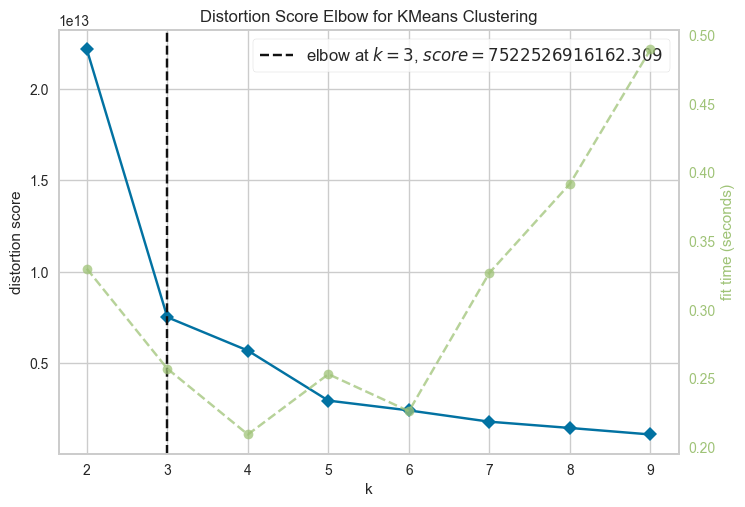

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

X = df


km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure




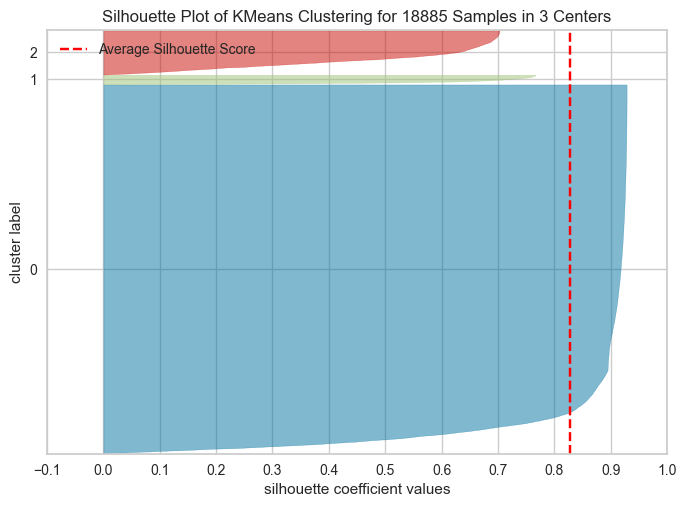

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18885 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
km = KMeans(n_clusters=3, random_state=42)
# Silhouette score for 3 clusters
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

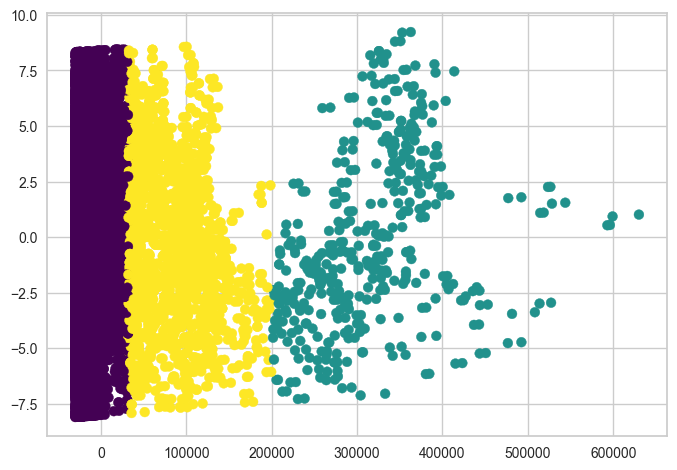

In [48]:
#scatter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

km = KMeans(n_clusters=3, random_state=42)
km.fit(X)
y_kmeans = km.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')



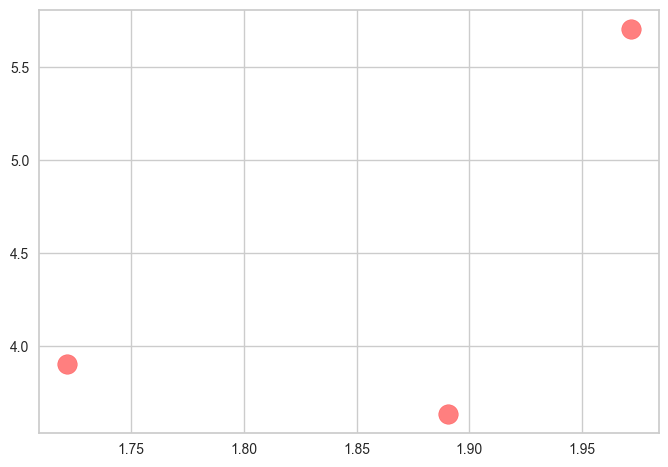

In [49]:

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)




# Conclusion

In conclusion, we successfully cleaned and preprocessed the San Francisco Airport air traffic passenger statistics dataset. We handled missing values, performed feature engineering, and transformed categorical variables into numerical representations. Using the KMeans clustering algorithm, we identified distinct clusters within the data, providing valuable insights into passenger traffic patterns. The visualizations and clustering results can help in making informed decisions for airport management and operations. This analysis demonstrates the importance of data preprocessing and clustering techniques in extracting meaningful information from complex datasets.